In [218]:
import nltk
import numpy as np
from nltk.corpus import udhr
from nltk.corpus import wordnet as wn

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem 1 

1781

1724

1972

1521

533

595

785

579

4.644020213363279
4.864849187935035
4.217545638945233
5.631821170282708


67

94

72

60

26.582089552238806

18.340425531914892

27.38888888888889

25.35

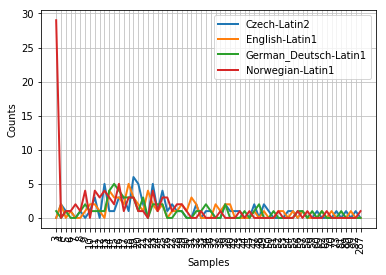

In [33]:
# udhr.fileids()[0:200]

languages = ['English-Latin1','Norwegian-Latin1','Czech-Latin2','German_Deutsch-Latin1']

# Number of Words
for lang in languages: 
    len(nltk.corpus.udhr.words(lang))

# Number of Unique Words
for lang in languages:
    len(set(udhr.words(lang)))
    
# Average Length of Words
for lang in languages:
    word_length = [len(w) for w in udhr.words(lang)]
    avg_word_length = np.mean(word_length)
    print(avg_word_length)
    
# Number of Sentences
for lang in languages:
    len(udhr.sents(lang))
    
# Average Words per Sentence
for lang in languages:
    len(udhr.words(lang)) / len(udhr.sents(lang))

cfd = nltk.ConditionalFreqDist(
    (lang, len(sents))
    for lang in languages
    for sents in udhr.sents(lang))
cfd.plot(cumulative = False)

|                       | # of Words | # Unique Words | Avg Length of words | # of Sentences | Avg Words per Sentence |
|-----------------------|------------|----------------|---------------------|----------------|------------------------|
| English-Latin1        | 1781       | 533            | 4.644               | 67             | 26.58                  |
| Norwegian-Latin1      | 1724       | 595            | 4.865               | 94             | 18.34                  |
| Czech-Latin2          | 1972       | 785            | 4.218               | 72             | 27.39                  |
| German_Deutsch-Latin1 | 1521       | 579            | 5.632               | 60             | 25.35                  |

## Problem 2

In [99]:
from nltk.book import *
text4

# Subsetting words with len > 7, and subsetting 10 most common of those words 
#words = [w for w in set(text4) if len(w) > 7]
words = ([w.lower() for w in set(text4) if len(w) > 7]) # from online example 
fdist = FreqDist(words)
most_common = fdist.most_common(10)
print(most_common)

# List of most common words
# most_common = ['comities','commonplace','visitation','unpracticed','debasement','smelting',
              #'constitution','subsidized','springing','conferring']
most_common = ['national','business','government','progress','congress','constitution','distrust','legitimate','powerful',
              'assistance']

<Text: Inaugural Address Corpus>

[('national', 3), ('business', 3), ('government', 3), ('progress', 3), ('congress', 3), ('constitution', 2), ('distrust', 2), ('legitimate', 2), ('powerful', 2), ('assistance', 2)]


In [100]:
# Loop calculating # of synonyms... essentially, for each word, the
# sum of all 'lemma names' in each 'synset' minus the copies of the word in question
for i in most_common:
    synonyms=[]
    for syn in wn.synsets(i):
        for l in syn.lemmas():
            synonyms.append(l.name())
    print("The synonyms for ",i,"are:")
    print(synonyms)
    print("The # of synonyms for ",i," :")
    if (len(wn.synsets(i)) > 1):
        len(synonyms) - len(wn.synsets(i)) # Each synset also produces the word in question, so we need to subtract the number of synsets to get real synonym number
    else: 
        len(synonyms) - 1 # If only one synset exists, minus 1 b/c the word in question is in the synset

The synonyms for  national are:
['national', 'subject', 'national', 'national', 'national', 'national', 'home', 'interior', 'internal', 'national', 'national', 'national']
The # of synonyms for  national  :


4

The synonyms for  business are:
['business', 'concern', 'business_concern', 'business_organization', 'business_organisation', 'commercial_enterprise', 'business_enterprise', 'business', 'occupation', 'business', 'job', 'line_of_work', 'line', 'business', 'business', 'business', 'business', 'business_sector', 'clientele', 'patronage', 'business', 'business', 'stage_business', 'byplay']
The # of synonyms for  business  :


15

The synonyms for  government are:
['government', 'authorities', 'regime', 'government', 'governing', 'governance', 'government_activity', 'administration', 'government', 'politics', 'political_science', 'government']
The # of synonyms for  government  :


8

The synonyms for  progress are:
['advancement', 'progress', 'progress', 'progression', 'procession', 'advance', 'advancement', 'forward_motion', 'onward_motion', 'progress', 'progression', 'advance', 'progress', 'come_on', 'come_along', 'advance', 'get_on', 'get_along', 'shape_up', 'advance', 'progress', 'pass_on', 'move_on', 'march_on', 'go_on', 'build_up', 'work_up', 'build', 'progress']
The # of synonyms for  progress  :


23

The synonyms for  congress are:
['Congress', 'United_States_Congress', 'U.S._Congress', 'US_Congress', 'congress', 'congress', 'sexual_intercourse', 'intercourse', 'sex_act', 'copulation', 'coitus', 'coition', 'sexual_congress', 'congress', 'sexual_relation', 'relation', 'carnal_knowledge']
The # of synonyms for  congress  :


13

The synonyms for  constitution are:
['fundamental_law', 'organic_law', 'constitution', 'constitution', 'establishment', 'formation', 'organization', 'organisation', 'United_States_Constitution', 'U.S._Constitution', 'US_Constitution', 'Constitution', 'Constitution_of_the_United_States', 'constitution', 'composition', 'physical_composition', 'makeup', 'make-up', 'Constitution', 'Old_Ironsides']
The # of synonyms for  constitution  :


15

The synonyms for  distrust are:
['misgiving', 'mistrust', 'distrust', 'suspicion', 'distrust', 'distrustfulness', 'mistrust', 'distrust', 'mistrust', 'suspect']
The # of synonyms for  distrust  :


7

The synonyms for  legitimate are:
['legalize', 'legalise', 'decriminalize', 'decriminalise', 'legitimize', 'legitimise', 'legitimate', 'legitimatize', 'legitimatise', 'legitimate', 'legitimate', 'legitimate', 'legitimate', 'logical', 'legitimate', 'lawful', 'legitimate', 'licit']
The # of synonyms for  legitimate  :


11

The synonyms for  powerful are:
['powerful', 'knock-down', 'powerful', 'potent', 'powerful', 'brawny', 'hefty', 'muscular', 'powerful', 'sinewy', 'herculean', 'powerful', 'mighty', 'mightily', 'powerful', 'right']
The # of synonyms for  powerful  :


10

The synonyms for  assistance are:
['aid', 'assist', 'assistance', 'help', 'aid', 'assistance', 'help']
The # of synonyms for  assistance  :


5


*MOST*: "Progress" has the most synonyms, with 18

In [94]:
# Hyponyms

wn.synsets("conferring")
confer = wn.synset('confer.v.01')
confer.root_hypernyms()


[Synset('confer.v.01'), Synset('confer.v.02')]

[Synset('act.v.01')]

In [113]:
for i in most_common:
    print("Word:" ,i)
    count = 0
    for j in wn.synsets(i):
        count1 = len(j.hyponyms())
        count += count1
    print("this is total count of hyponyms: ",count)

Word: national
this is total count of hyponyms:  3
Word: business
this is total count of hyponyms:  49
Word: government
this is total count of hyponyms:  21
Word: progress
this is total count of hyponyms:  22
Word: congress
this is total count of hyponyms:  6
Word: constitution
this is total count of hyponyms:  10
Word: distrust
this is total count of hyponyms:  2
Word: legitimate
this is total count of hyponyms:  1
Word: powerful
this is total count of hyponyms:  0
Word: assistance
this is total count of hyponyms:  12


## Problem 3

In [219]:
# The homework document I received didn't include a linear equation. 
# I'm going with Y = X + 100

dist = 3 - (-2)
leng_per_point = 5/100

# Creating 100 distinct points along the line Y=X between X=[-2,3]
# Each element in 'point_table' is a X value
point_table = [0 for x in range(100)]
for i in range(0,100):
        point_table[i] = -2 + leng_per_point*i 
        
print(point_table)
len(point_table)




[-2.0, -1.95, -1.9, -1.85, -1.8, -1.75, -1.7, -1.65, -1.6, -1.55, -1.5, -1.45, -1.4, -1.35, -1.2999999999999998, -1.25, -1.2, -1.15, -1.1, -1.0499999999999998, -1.0, -0.95, -0.8999999999999999, -0.8499999999999999, -0.7999999999999998, -0.75, -0.7, -0.6499999999999999, -0.5999999999999999, -0.5499999999999998, -0.5, -0.44999999999999996, -0.3999999999999999, -0.34999999999999987, -0.2999999999999998, -0.25, -0.19999999999999996, -0.1499999999999999, -0.09999999999999987, -0.04999999999999982, 0.0, 0.050000000000000266, 0.10000000000000009, 0.1499999999999999, 0.20000000000000018, 0.25, 0.30000000000000027, 0.3500000000000001, 0.40000000000000036, 0.4500000000000002, 0.5, 0.5500000000000003, 0.6000000000000001, 0.6500000000000004, 0.7000000000000002, 0.75, 0.8000000000000003, 0.8500000000000001, 0.9000000000000004, 0.9500000000000002, 1.0, 1.0500000000000003, 1.1, 1.1500000000000004, 1.2000000000000002, 1.25, 1.3000000000000003, 1.35, 1.4000000000000004, 1.4500000000000002, 1.5, 1.55000

100

In [220]:
# Creating Input and Output into one Pandas dataframe, and doing train/test splits
df = pd.DataFrame(columns = ['input', 'output']) 
df['input'] = point_table
for k in range(len(point_table)):
    df['output'][k] = df['input'][k] + 100

# Train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['input'], df['output'], train_size=0.75,test_size=0.25, random_state=7)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [227]:

# Creating 1-Layer model
from tensorflow.python import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Activation, Dense, Input
from keras.models import Model


# inputs = Input(shape=(100,))
# x = Dense(64, activation='relu')(X_train)

model.add(Dense(1, kernel_initializer='uniform', input_shape=[1,])) 
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train,y_train)

ValueError: Tensor("dense_1/kernel:0", shape=(1, 1), dtype=float32_ref) must be from the same graph as Tensor("activation_21/Softmax:0", shape=(?, 1), dtype=float32).

In [222]:
X_train <- X_train.to_frame()
y_train <- y_train.to_frame()
print(X_train)
 

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,input,97,51,30,74,96,65,54,27,58,...,94,14,57,92,23,83,67,25,68,47
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,output,97,51,30,74,96,65,54,27,58,...,94,14,57,92,23,83,67,25,68,47
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


97    2.85
51    0.55
30   -0.50
74    1.70
96    2.80
65    1.25
54    0.70
27   -0.65
58    0.90
33   -0.35
43    0.15
36   -0.20
21   -0.95
32   -0.40
70    1.50
62    1.10
99    2.95
73    1.65
59    0.95
41    0.05
10   -1.50
76    1.80
95    2.75
28   -0.60
80    2.00
29   -0.55
31   -0.45
16   -1.20
81    2.05
1    -1.95
      ... 
79    1.95
24   -0.80
56    0.80
69    1.45
63    1.15
82    2.10
60    1.00
19   -1.05
6    -1.70
55    0.75
75    1.75
0    -2.00
44    0.20
7    -1.65
48    0.40
98    2.90
39   -0.05
8    -1.60
42    0.10
72    1.60
94    2.70
14   -1.30
57    0.85
92    2.60
23   -0.85
83    2.15
67    1.35
25   -0.75
68    1.40
47    0.35
Name: input, Length: 75, dtype: float64


UnboundLocalError: local variable 'a' referenced before assignment

In [213]:
print(df)
X_train

    input  output
0   -2.00      98
1   -1.95   98.05
2   -1.90    98.1
3   -1.85   98.15
4   -1.80    98.2
5   -1.75   98.25
6   -1.70    98.3
7   -1.65   98.35
8   -1.60    98.4
9   -1.55   98.45
10  -1.50    98.5
11  -1.45   98.55
12  -1.40    98.6
13  -1.35   98.65
14  -1.30    98.7
15  -1.25   98.75
16  -1.20    98.8
17  -1.15   98.85
18  -1.10    98.9
19  -1.05   98.95
20  -1.00      99
21  -0.95   99.05
22  -0.90    99.1
23  -0.85   99.15
24  -0.80    99.2
25  -0.75   99.25
26  -0.70    99.3
27  -0.65   99.35
28  -0.60    99.4
29  -0.55   99.45
..    ...     ...
70   1.50   101.5
71   1.55  101.55
72   1.60   101.6
73   1.65  101.65
74   1.70   101.7
75   1.75  101.75
76   1.80   101.8
77   1.85  101.85
78   1.90   101.9
79   1.95  101.95
80   2.00     102
81   2.05  102.05
82   2.10   102.1
83   2.15  102.15
84   2.20   102.2
85   2.25  102.25
86   2.30   102.3
87   2.35  102.35
88   2.40   102.4
89   2.45  102.45
90   2.50   102.5
91   2.55  102.55
92   2.60   102.6
93   2.65 

97    2.85
51    0.55
30   -0.50
74    1.70
96    2.80
65    1.25
54    0.70
27   -0.65
58    0.90
33   -0.35
43    0.15
36   -0.20
21   -0.95
32   -0.40
70    1.50
62    1.10
99    2.95
73    1.65
59    0.95
41    0.05
10   -1.50
76    1.80
95    2.75
28   -0.60
80    2.00
29   -0.55
31   -0.45
16   -1.20
81    2.05
1    -1.95
      ... 
79    1.95
24   -0.80
56    0.80
69    1.45
63    1.15
82    2.10
60    1.00
19   -1.05
6    -1.70
55    0.75
75    1.75
0    -2.00
44    0.20
7    -1.65
48    0.40
98    2.90
39   -0.05
8    -1.60
42    0.10
72    1.60
94    2.70
14   -1.30
57    0.85
92    2.60
23   -0.85
83    2.15
67    1.35
25   -0.75
68    1.40
47    0.35
Name: input, Length: 75, dtype: float64